## 가설 2
- 가설 : 성공한 게임이 플레이 시간이 높다면 유저의 만족도가 높을 것이다.
    - 성공적인 게임의 기준은 긍정 리뷰 70%, 개수 500개 이상으로 잡는다.
    
### 데이터 이상치 정의
- playtime의 범위는 20분 이상, 2000분 이하로 잡는다. 이 외에는 이상치로 정의

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# 함수 설정

In [2]:
# 이상치 설정
def average_playtime_setting_outlier(data, min_data, max_data):
    cond1 = data['average_playtime'] >= min_data
    cond2 = data['average_playtime'] <= max_data
    
    data = data[cond1 & cond2]
    
    return data

def median_playtime_setting_outlier(data, min_data, max_data):
    cond1 = data['median_playtime'] >= min_data
    cond2 = data['median_playtime'] <= max_data

    data = data[cond1 & cond2]

    return data

In [3]:
def success_game_range(data, rating_ratio, count_reviews):
    cond1 = data['positive_rating_ratio'] >= rating_ratio
    cond2 = data['total_ratings'] >= count_reviews
    
    data = data[cond1 & cond2]
    
    return data

def mixed_game_range(data, min_ratio, max_ratio, count_reveiws):
    cond1 = data['positive_rating_ratio'] >= min_ratio
    cond2 = data['positive_rating_ratio'] < max_ratio    
    cond3 = data['total_ratings'] >= count_reveiws
    
    data = data[cond1 & cond2 & cond3]
    
    return data

def fail_game_range2(data, rating_ratio, count_reviews):
    cond1 = data['positive_rating_ratio'] < rating_ratio
    cond2 = data['total_ratings'] >= count_reviews
    
    data = data[cond1 & cond2]
    
    return data

In [4]:
# 박스플롯 사용하여 시각화
def boxplot_population(data, col):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data)
    title = 'distribution ' + col
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def boxplot_population2(data, col1, col2):
    plt.figure(figsize=(10, 6))
    plt.boxplot([data[col1], data[col2]], labels=[col1, col2])

    title = 'distribution ' + col1 + ', ' + col2
    plt.title(title)
    plt.grid(True)
    plt.show()
    
# 밀도함수 사용하여 시각화
def density_population(data, col, min_limit, max_limit):
    plt.figure(figsize=(10, 6))

    data[col].plot.density(color = 'skyblue')
    plt.xlim([min_limit, max_limit])
    
# 하나의 데이터에서 2개의 칼러을 비교
def density_population2(data, col1, col2):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(data[col1], label=col1, shade=True)
    sns.kdeplot(data[col2], label=col2, shade=True)
    title = 'Density of ' + col1 + ', ' + col2
    plt.title(title)
    plt.ylabel('density')
    plt.legend()
    
# 2개의 데이터에서 하나의 칼럼을 비교
def density_population3(data1, data2, col):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(data1[col], label='Data1', shade=True)
    sns.kdeplot(data2[col], label='Data2', shade=True)
    title = 'Density of ' + col
    plt.title(title)
    
    plt.xlabel(col)
    plt.ylabel('density')
    plt.legend()

In [5]:
# t-test 자동화
# 하나의 데이터로 다른 칼럼 t-test
def do_ttest1(data, col1, col2, alternative):
    result_ttest = ttest_ind(data[col1], data[col2], equal_var=False, alternative=alternative)

    return result_ttest
def do_ttest2(data1, data2, col, alternative):
    result_ttest = ttest_ind(data1[col], data2[col], equal_var=False, alternative=alternative)
    
    return result_ttest

In [6]:
df = pd.read_csv('5 Tags in steamspy.csv')
df

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1020340,Audica,2019-03-07,1,True,False,False,"Harmonix Music Systems, Inc","Harmonix Music Systems, Inc",0,...,0.795181,17,17,0-20000,15.49,rhythm,music,vr,early_access,action
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime
6168,1043180,Lovers of Aether,2019-04-01,1,True,True,False,Dan Fornace,Dan Fornace,0,...,0.957353,12,12,50000-100000,0.00,psychological_horror,dating_sim,casual,indie,free_to_play


In [7]:
data = average_playtime_setting_outlier(df, 30, 1000)
data = median_playtime_setting_outlier(data, 30, 1000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,0.893871,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,0.000000,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [8]:
success_game_data = success_game_range(data, 0.7, 500)
success_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,0.893871,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6154,992300,Ã¥ÂÂÃ¨Â¡ÂÃ¥ÂÂ° Bloody Spell,2019-01-15,1,True,False,False,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,0,...,0.802156,36,36,50000-100000,15.49,action,indie,early_access,rpg,violent
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


In [9]:
success_game_data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price
appid,1.000000,-0.139154,NaN,-0.011626,-0.064963,-0.061905,0.131643,-0.105232,-0.076181,-0.105137,-0.001771,-0.059128,-0.004737,0.054545
english,-0.139154,1.000000,NaN,0.051057,0.046267,0.023879,-0.000251,0.019096,0.023004,0.020058,-0.003150,-0.032524,-0.042052,0.004459
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.011626,0.051057,NaN,1.000000,0.683081,-0.145853,-0.039772,0.076502,-0.019849,0.068408,0.127194,0.004302,-0.001356,-0.101449
environ_Linux,-0.064963,0.046267,NaN,0.683081,1.000000,-0.120879,-0.037586,0.079912,-0.006879,0.072935,0.109163,0.015758,0.010242,-0.039236
required_age,-0.061905,0.023879,NaN,-0.145853,-0.120879,1.000000,-0.010345,0.187668,0.169445,0.191079,-0.011171,0.136755,0.104712,0.205850
achievements,0.131643,-0.000251,NaN,-0.039772,-0.037586,-0.010345,1.000000,-0.002241,-0.001963,-0.002275,0.038426,-0.029169,-0.023176,-0.042747
positive_ratings,-0.105232,0.019096,NaN,0.076502,0.079912,0.187668,-0.002241,1.000000,0.705646,0.997140,0.205401,0.302272,0.068208,0.088041
negative_ratings,-0.076181,0.023004,NaN,-0.019849,-0.006879,0.169445,-0.001963,0.705646,1.000000,0.757179,-0.162297,0.317033,0.070238,0.119830
total_ratings,-0.105137,0.020058,NaN,0.068408,0.072935,0.191079,-0.002275,0.997140,0.757179,1.000000,0.172043,0.312472,0.070371,0.093944


In [45]:
fail_game_data = fail_game_range2(data, 0.5, 100)
fail_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
132,7530,Two Worlds II Castle Defense,2011-06-14,1,True,True,False,Reality Pump Studios,Topware Interactive,0,...,0.440922,320,330,200000-500000,6.99,strategy,tower_defense,fantasy,puzzle_platformer,real_time_tactics
180,10220,Postal III,2012-02-17,1,True,False,False,Trashmasters,Akella,18,...,0.367968,411,411,50000-100000,8.99,action,dark_humor,gore,open_world,funny
193,11590,Hospital Tycoon,2009-02-13,1,True,False,False,Deep Red Limited,Codemasters,0,...,0.367647,119,176,200000-500000,3.49,simulation,management,singleplayer,1980s,puzzle_platformer
275,18400,Crazy Machines 2,2008-06-20,1,True,False,False,Fakt Software,Viva Media,0,...,0.473171,66,66,100000-200000,7.19,casual,strategy,puzzle,physics,singleplayer
361,27330,Blacklight: Tango Down,2010-07-14,1,True,False,False,Zombie Studios,Ignition Entertainment,0,...,0.387097,129,193,50000-100000,0.79,action,fps,multiplayer,1980s,quick_time_events
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6081,876330,Revelation Online,2018-08-07,1,True,False,False,Netease Games,My.com,0,...,0.497059,686,686,100000-200000,0.00,free_to_play,rpg,mmorpg,massively_multiplayer,1980s
6112,911400,Assassin's CreedÃÂ® III Remastered,2019-03-29,1,True,False,False,Ubisoft Entertainment,Ubisoft Entertainment\t\t\t\t,0,...,0.325789,80,80,50000-100000,33.99,action,adventure,assassin,open_world,1980s
6116,921060,Modern Combat 5,2018-10-24,1,True,False,False,Gameloft,Gameloft,0,...,0.432135,129,69,200000-500000,0.00,free_to_play,massively_multiplayer,fps,action,shooter
6117,921590,DISSIDIA FINAL FANTASY NT Free Edition,2019-03-12,1,True,False,False,"Square Enix;KOEI TECMO GAMES CO., LTD.",Square Enix,0,...,0.381538,285,289,200000-500000,0.00,free_to_play,action,multiplayer,fighting,anime


In [46]:
fail_game_data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price
appid,1.000000,-0.034327,NaN,-0.127446,-0.064222,-0.092866,0.126820,-0.010685,-0.037875,-0.025294,0.103055,0.057773,0.004254,-0.220182
english,-0.034327,1.000000,NaN,0.038004,0.032147,0.018754,0.010659,0.016000,0.021940,0.019286,-0.068908,0.079458,0.080783,0.046357
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.127446,0.038004,NaN,1.000000,0.740754,-0.052022,-0.017709,0.043370,0.039764,0.041743,0.067126,0.077386,0.088444,0.157029
environ_Linux,-0.064222,0.032147,NaN,0.740754,1.000000,-0.101281,-0.005206,-0.028946,-0.017348,-0.022946,-0.017834,0.065662,0.081787,0.065026
required_age,-0.092866,0.018754,NaN,-0.052022,-0.101281,1.000000,-0.009649,0.194657,0.201828,0.199837,0.030480,0.022840,0.032079,0.268876
achievements,0.126820,0.010659,NaN,-0.017709,-0.005206,-0.009649,1.000000,-0.012862,-0.019682,-0.016597,-0.009018,0.120615,0.019769,-0.029682
positive_ratings,-0.010685,0.016000,NaN,0.043370,-0.028946,0.194657,-0.012862,1.000000,0.972513,0.992222,0.153793,0.161923,0.046983,0.256926
negative_ratings,-0.037875,0.021940,NaN,0.039764,-0.017348,0.201828,-0.019682,0.972513,1.000000,0.993934,0.045126,0.137193,0.044682,0.260532
total_ratings,-0.025294,0.019286,NaN,0.041743,-0.022946,0.199837,-0.016597,0.992222,0.993934,1.000000,0.096765,0.149823,0.046078,0.260631


### 성공한 게임은 가격의 영향이 없지만, 실패한 게임은 가격의 영향이 있나?

In [47]:
data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price
appid,1.000000,-0.117447,NaN,-0.093281,-0.096339,-0.094617,0.084540,-0.159758,-0.121409,-0.162535,-0.118613,-0.035727,-0.013416,-0.077651
english,-0.117447,1.000000,NaN,0.043247,0.036040,0.017513,0.005004,0.012046,0.017110,0.013485,-0.007064,-0.014825,-0.017433,0.004040
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.093281,0.043247,NaN,1.000000,0.698445,-0.066581,-0.016948,0.102245,-0.000055,0.091997,0.224975,0.004131,0.006854,0.009475
environ_Linux,-0.096339,0.036040,NaN,0.698445,1.000000,-0.065776,-0.008905,0.091242,-0.008714,0.080758,0.174049,0.017383,0.019154,0.030997
required_age,-0.094617,0.017513,NaN,-0.066581,-0.065776,1.000000,-0.004965,0.207474,0.202764,0.218054,0.051958,0.098958,0.073539,0.223174
achievements,0.084540,0.005004,NaN,-0.016948,-0.008905,-0.004965,1.000000,0.004468,0.008070,0.005268,-0.006477,-0.012054,-0.019087,-0.021659
positive_ratings,-0.159758,0.012046,NaN,0.102245,0.091242,0.207474,0.004468,1.000000,0.597667,0.992284,0.231712,0.265109,0.086274,0.170880
negative_ratings,-0.121409,0.017110,NaN,-0.000055,-0.008714,0.202764,0.008070,0.597667,1.000000,0.692458,-0.017573,0.248077,0.082466,0.189188
total_ratings,-0.162535,0.013485,NaN,0.091997,0.080758,0.218054,0.005268,0.992284,0.692458,1.000000,0.205791,0.276924,0.090387,0.183025


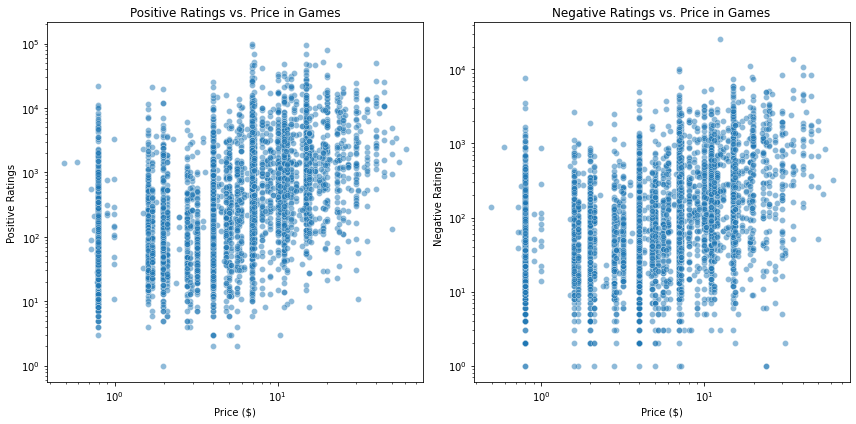

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

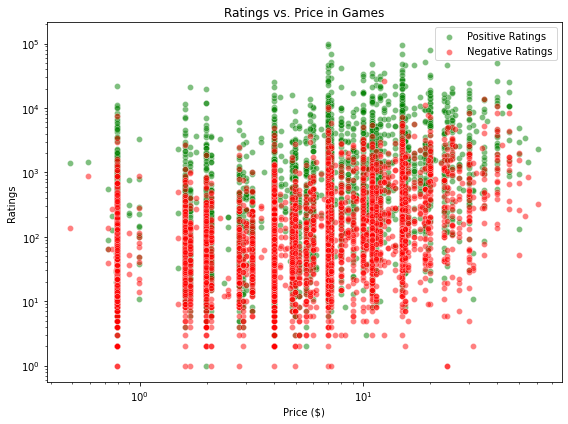

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

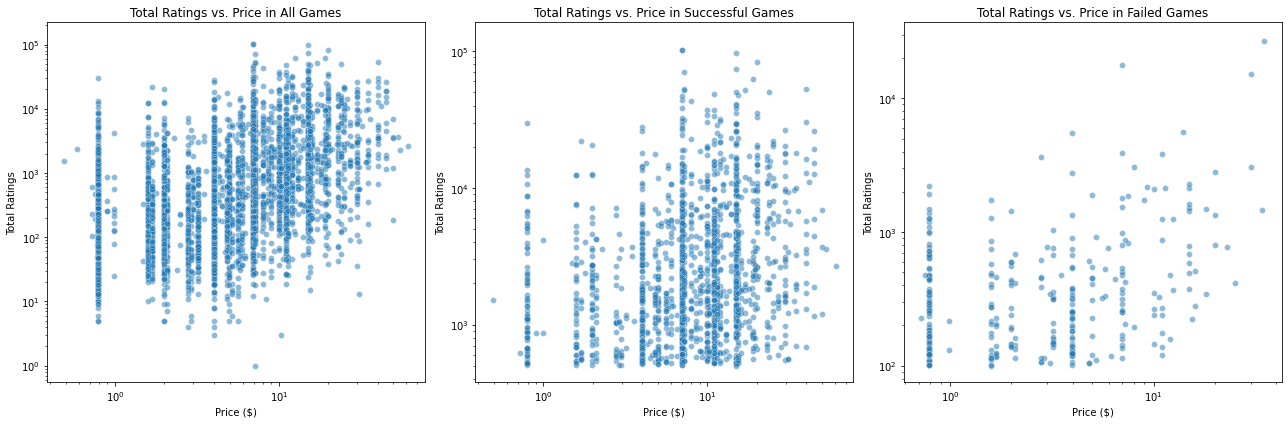

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 전체 데이터프레임의 총 리뷰의 수와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='total_ratings', data=data, alpha=0.5)
axes[0].set_title('Total Ratings vs. Price in All Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Total Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 성공한 게임의 총 리뷰 수와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='total_ratings', data=success_game_data, alpha=0.5)
axes[1].set_title('Total Ratings vs. Price in Successful Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Total Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# 실패한 게임의 총 리뷰 수와 가격의 관계 시각화
sns.scatterplot(ax=axes[2], x='price', y='total_ratings', data=fail_game_data, alpha=0.5)
axes[2].set_title('Total Ratings vs. Price in Failed Games')
axes[2].set_xlabel('Price ($)')
axes[2].set_ylabel('Total Ratings')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

In [51]:
pearson_corr_df = pearsonr(data['price'], data['total_ratings'])
pearson_corr_success = pearsonr(success_game_data['price'], success_game_data['total_ratings'])
pearson_corr_fail = pearsonr(fail_game_data['price'], fail_game_data['total_ratings'])

pearson_corr_df, pearson_corr_success, pearson_corr_fail

((0.18302461447996826, 4.5471046799858287e-35),
 (0.09394397206786931, 5.8339053128310736e-05),
 (0.26063056705878573, 1.185162350203491e-06))

In [52]:
pearson_corr_positive = pearsonr(fail_game_data['price'], fail_game_data['positive_ratings'])
pearson_corr_negative = pearsonr(fail_game_data['price'], fail_game_data['negative_ratings'])
pearson_corr_total = pearsonr(fail_game_data['price'], fail_game_data['total_ratings'])

pearson_corr_positive, pearson_corr_negative, pearson_corr_total

((0.2569258543294675, 1.696176668761781e-06),
 (0.260531685970422, 1.1966423994168127e-06),
 (0.26063056705878573, 1.185162350203491e-06))

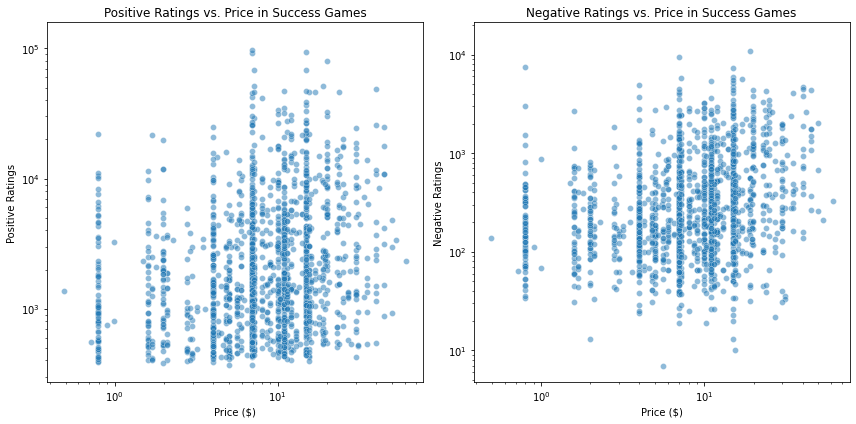

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=success_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Success Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=success_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Success Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

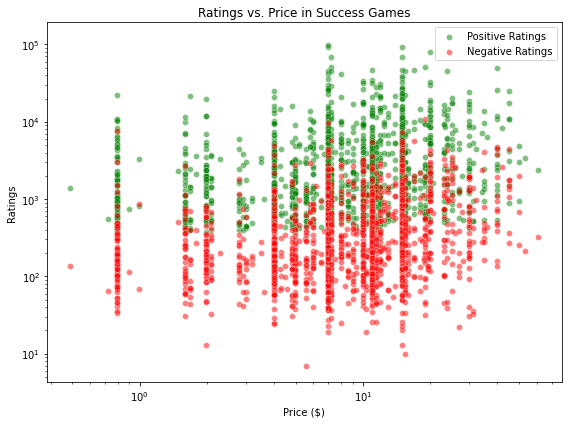

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=success_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=success_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Success Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

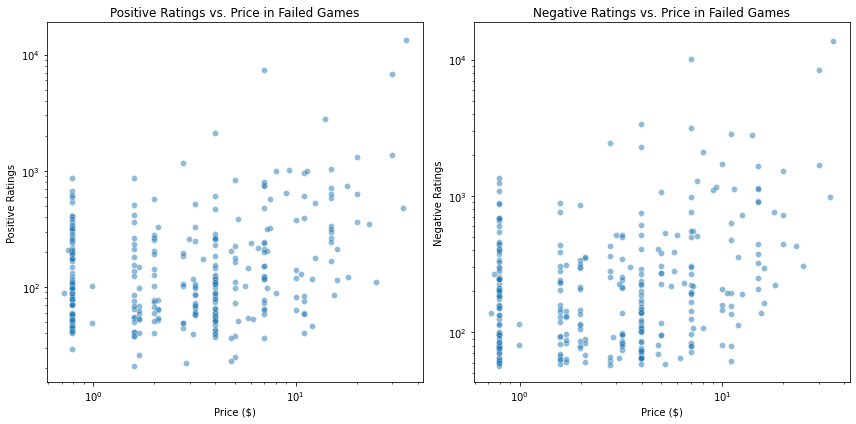

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=fail_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Failed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=fail_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Failed Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

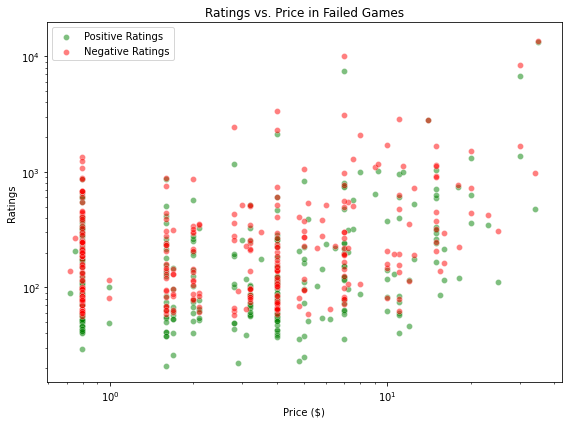

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Failed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

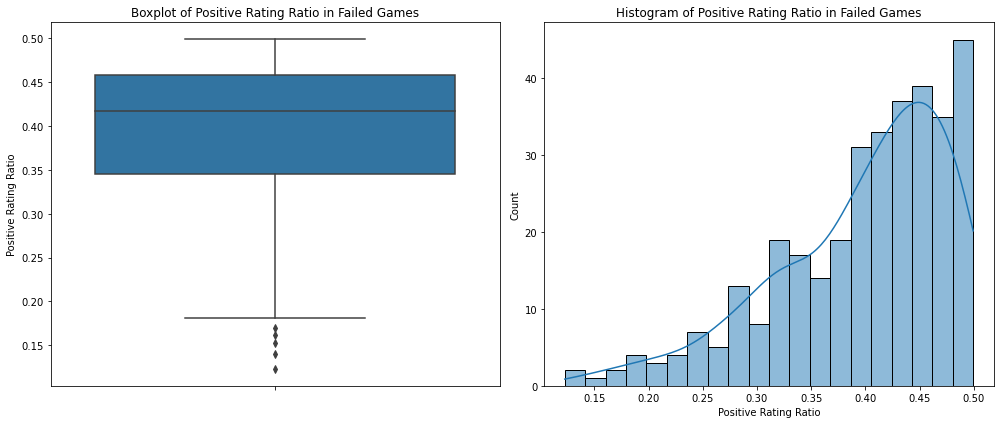

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 박스플롯
sns.boxplot(y=fail_game_data['positive_rating_ratio'], ax=ax[0])
ax[0].set_title('Boxplot of Positive Rating Ratio in Failed Games')
ax[0].set_ylabel('Positive Rating Ratio')

# 히스토그램
sns.histplot(fail_game_data['positive_rating_ratio'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Positive Rating Ratio in Failed Games')
ax[1].set_xlabel('Positive Rating Ratio')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 실패한 게임(fail_game_data)에서 가격(Price)와 리뷰에 대해 분석한 결과
- 전체, 성공한 게임에서의 가격과 리뷰의 상관계수보다 실패한 게임의 가격과 리뷰의 상관계수가 양의 상관관계를 보여 분석해봤다.
- 그러나, 0.4 ~ 0.5 구간의 데이터가 너무 많았다.
- 스팀의 경우 0.4 ~ 0.69 구간의 리뷰 평가는 '복합적'이라는 평가가 있어 실패한 게임의 요인으로 생각될 수 없을 수도 있을 것이라 생각함
- 따라서, 실패한 게임의 긍정 리뷰 비율을 0.4 미만으로 잡고 다시 해보자.

In [21]:
fail_game_data = fail_game_range2(data, 0.4, 100)
fail_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
180,10220,Postal III,2012-02-17,1,True,False,False,Trashmasters,Akella,18,...,0.367968,411,411,50000-100000,8.99,action,dark_humor,gore,open_world,funny
193,11590,Hospital Tycoon,2009-02-13,1,True,False,False,Deep Red Limited,Codemasters,0,...,0.367647,119,176,200000-500000,3.49,simulation,management,singleplayer,1980s,puzzle_platformer
361,27330,Blacklight: Tango Down,2010-07-14,1,True,False,False,Zombie Studios,Ignition Entertainment,0,...,0.387097,129,193,50000-100000,0.79,action,fps,multiplayer,1980s,quick_time_events
365,27940,Dead Horde,2011-07-27,1,True,False,False,DnS Development,DnS Development,0,...,0.336601,82,82,50000-100000,4.79,action,zombies,indie,survival,multiplayer
506,46540,Trapped Dead,2011-07-15,1,True,False,False,Headup Games / Crenetic,Headup Games,0,...,0.386228,142,157,100000-200000,3.99,zombies,strategy,action,adventure,co_op
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,743090,Defiance 2050,2018-07-10,1,True,False,False,Trion Worlds,Trion Worlds,18,...,0.394052,77,37,200000-500000,0.00,free_to_play,massively_multiplayer,adventure,open_world,violent
5890,773240,Raceland,2018-01-05,1,True,False,False,Norven Games;Kaan KÃÂ¶se,Norven Games;Kaan KÃÂ¶se,0,...,0.315476,45,45,20000-50000,0.79,racing,indie,casual,1980s,puzzle_platformer
6112,911400,Assassin's CreedÃÂ® III Remastered,2019-03-29,1,True,False,False,Ubisoft Entertainment,Ubisoft Entertainment\t\t\t\t,0,...,0.325789,80,80,50000-100000,33.99,action,adventure,assassin,open_world,1980s
6117,921590,DISSIDIA FINAL FANTASY NT Free Edition,2019-03-12,1,True,False,False,"Square Enix;KOEI TECMO GAMES CO., LTD.",Square Enix,0,...,0.381538,285,289,200000-500000,0.00,free_to_play,action,multiplayer,fighting,anime


In [22]:
fail_game_data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price
appid,1.000000,NaN,NaN,-0.147366,-0.076430,-0.101562,0.173554,-0.112141,-0.138003,-0.132495,0.181026,0.091264,-0.011631,-0.117727
english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.147366,NaN,NaN,1.000000,0.793336,-0.102682,-0.015016,-0.020473,0.014601,0.003921,0.021709,0.020878,0.058188,0.050912
environ_Linux,-0.076430,NaN,NaN,0.793336,1.000000,-0.097481,-0.008770,-0.018923,0.020993,0.008920,-0.037961,0.012567,0.051474,0.027227
required_age,-0.101562,NaN,NaN,-0.102682,-0.097481,1.000000,-0.024145,0.271376,0.276316,0.279915,-0.072441,0.049435,0.053960,0.169870
achievements,0.173554,NaN,NaN,-0.015016,-0.008770,-0.024145,1.000000,-0.070946,-0.073301,-0.073929,0.111397,0.249876,0.049895,-0.073796
positive_ratings,-0.112141,NaN,NaN,-0.020473,-0.018923,0.271376,-0.070946,1.000000,0.914854,0.958464,0.085425,-0.115554,-0.061412,0.063881
negative_ratings,-0.138003,NaN,NaN,0.014601,0.020993,0.276316,-0.073301,0.914854,1.000000,0.992020,-0.161044,-0.091018,-0.018929,0.110897
total_ratings,-0.132495,NaN,NaN,0.003921,0.008920,0.279915,-0.073929,0.958464,0.992020,1.000000,-0.087081,-0.100373,-0.032547,0.098280


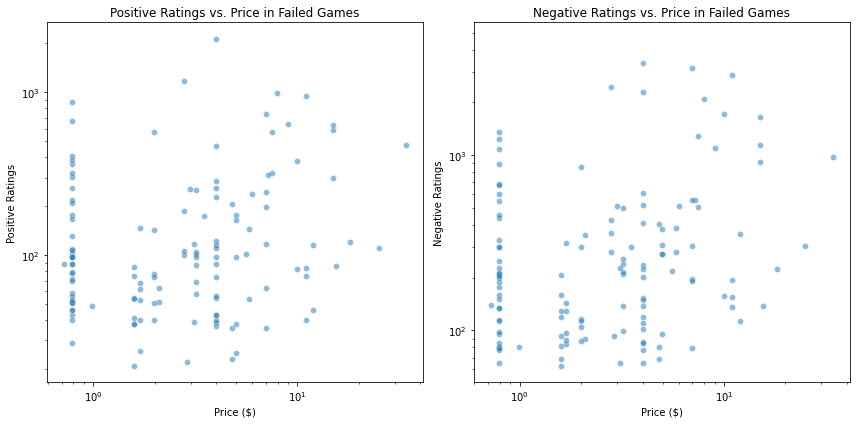

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=fail_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Failed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=fail_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Failed Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')


plt.tight_layout()
plt.show()

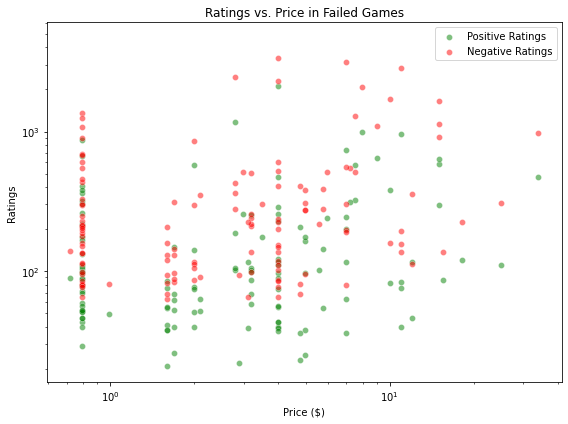

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Failed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

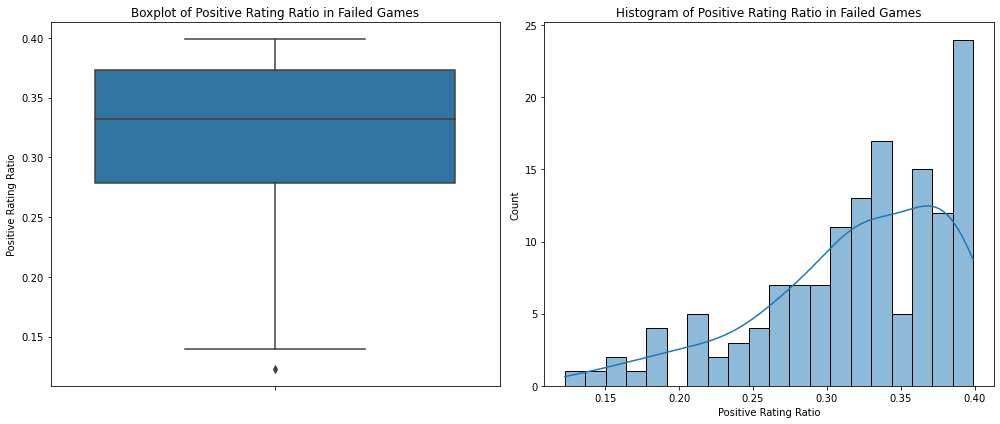

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 박스플롯
sns.boxplot(y=fail_game_data['positive_rating_ratio'], ax=ax[0])
ax[0].set_title('Boxplot of Positive Rating Ratio in Failed Games')
ax[0].set_ylabel('Positive Rating Ratio')

# 히스토그램
sns.histplot(fail_game_data['positive_rating_ratio'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Positive Rating Ratio in Failed Games')
ax[1].set_xlabel('Positive Rating Ratio')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 놀랍게도 긍정 리뷰 비율이 0.4 미만인 데이터에서는 Price와 리뷰와의 관계는 찾지 못했다.

## 이번에는 실패하지도, 성공하지도 않은 게임 데이터로 분석해보자.
### 1. 실패하지도, 성공하지도 않은 게임을 복합적인 게임으로 정의하여 기준을 다음과 같이 정했다.
    - 긍정 리뷰의 비율(positive_rating_ratio)이 0.4이상, 0.7 미만인 게임 데이터
    - 리뷰의 수(total_ratings)는 100개 이상

In [26]:
mixed_game_data = mixed_game_range(df, 0.4, 0.7, 100)
mixed_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
33,1690,Space Empires V,2006-10-16,1,True,False,False,Malfador Machinations,Strategy First,0,...,0.692029,35,35,50000-100000,10.99,strategy,4x,space,sci_fi,turn_based
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
62,2870,X Rebirth,2013-11-15,1,True,True,True,Egosoft,Egosoft,0,...,0.412587,1744,3386,200000-500000,24.99,space,simulation,sci_fi,action,space_sim
67,3260,Safecracker: The Ultimate Puzzle Adventure,2007-08-29,1,True,False,False,Kheops Studio,HandyGames,0,...,0.598131,1,1,50000-100000,4.49,puzzle,adventure,casual,point_&_click,first_person
87,4520,Full Spectrum Warrior,2007-07-17,1,True,False,False,Pandemic Studios,THQ Nordic,0,...,0.638554,124,244,100000-200000,7.99,strategy,action,military,tactical,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,921630,Ã©ÂÂ³Ã§ÂÂµ INVAXION,2018-12-19,1,True,False,False,Nanjing AQUATRAX,bilibili,0,...,0.547649,760,760,100000-200000,11.29,music,rhythm,indie,casual,anime
6137,955900,Ã¤ÂºÂÃ¤Â¸ÂÃ¨ÂµÂ·Ã§ÂÂÃ¤Â¿Â®Ã¤Â»ÂÃ¦Â¨Â¡Ã¦Â...,2019-01-10,0,True,False,False,GSQ Games,Gamera Game,0,...,0.625422,4164,4164,200000-500000,14.49,simulation,early_access,strategy,rpg,indie
6138,960090,Bloons TD 6,2018-12-17,1,True,False,False,Ninja Kiwi,Ninja Kiwi,0,...,0.672751,2819,2819,200000-500000,6.99,strategy,tower_defense,singleplayer,1980s,puzzle_platformer
6141,964470,Shakes and Fidget Remastered,2018-11-22,1,True,False,False,Playa Games GmbH,Playa Games GmbH,0,...,0.652733,50,91,50000-100000,0.00,free_to_play,casual,rpg,strategy,indie


In [27]:
mixed_game_data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price
appid,1.000000,-0.114783,NaN,-0.065667,-0.057754,-0.074305,0.105238,0.002924,0.012031,0.007303,-0.059837,0.027780,0.029528,-0.090230
english,-0.114783,1.000000,NaN,0.041960,0.045820,0.021361,0.004742,0.009012,0.007101,0.008140,0.025404,-0.002417,-0.004861,0.033507
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.065667,0.041960,NaN,1.000000,0.667746,-0.069131,0.011356,-0.030447,-0.031321,-0.031014,0.103316,-0.007727,0.006713,-0.017860
environ_Linux,-0.057754,0.045820,NaN,0.667746,1.000000,-0.064843,0.033900,-0.019361,-0.022721,-0.021065,0.090942,0.036491,0.043142,0.013894
required_age,-0.074305,0.021361,NaN,-0.069131,-0.064843,1.000000,-0.013867,0.067270,0.044416,0.056644,0.005921,0.049572,0.013641,0.214574
achievements,0.105238,0.004742,NaN,0.011356,0.033900,-0.013867,1.000000,-0.004443,-0.003849,-0.004180,0.026304,-0.010490,-0.010708,-0.021227
positive_ratings,0.002924,0.009012,NaN,-0.030447,-0.019361,0.067270,-0.004443,1.000000,0.980655,0.995590,0.015516,0.370392,0.182789,0.200967
negative_ratings,0.012031,0.007101,NaN,-0.031321,-0.022721,0.044416,-0.003849,0.980655,1.000000,0.994694,-0.017512,0.345257,0.181466,0.152584
total_ratings,0.007303,0.008140,NaN,-0.031014,-0.021065,0.056644,-0.004180,0.995590,0.994694,1.000000,-0.000238,0.360145,0.183044,0.178755


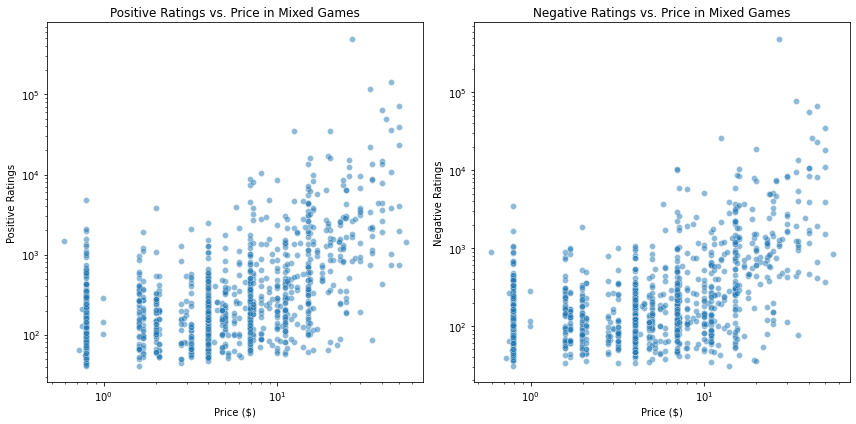

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Mixed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Mixed Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

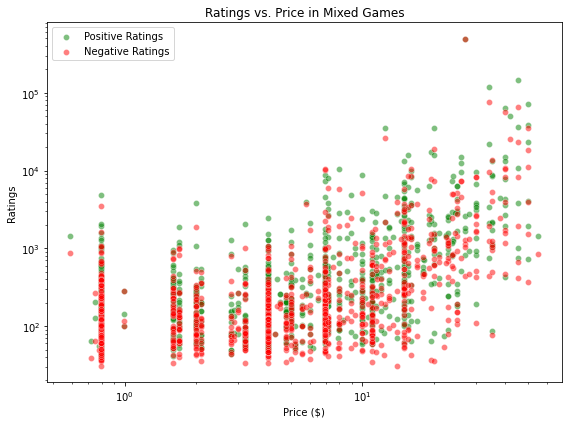

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Mixed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

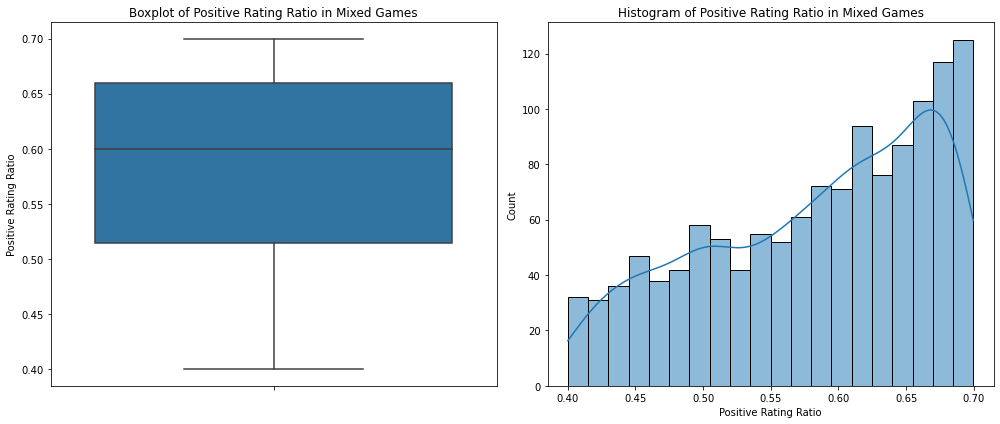

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 박스플롯
sns.boxplot(y=mixed_game_data['positive_rating_ratio'], ax=ax[0])
ax[0].set_title('Boxplot of Positive Rating Ratio in Mixed Games')
ax[0].set_ylabel('Positive Rating Ratio')

# 히스토그램
sns.histplot(mixed_game_data['positive_rating_ratio'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Positive Rating Ratio in Mixed Games')
ax[1].set_xlabel('Positive Rating Ratio')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


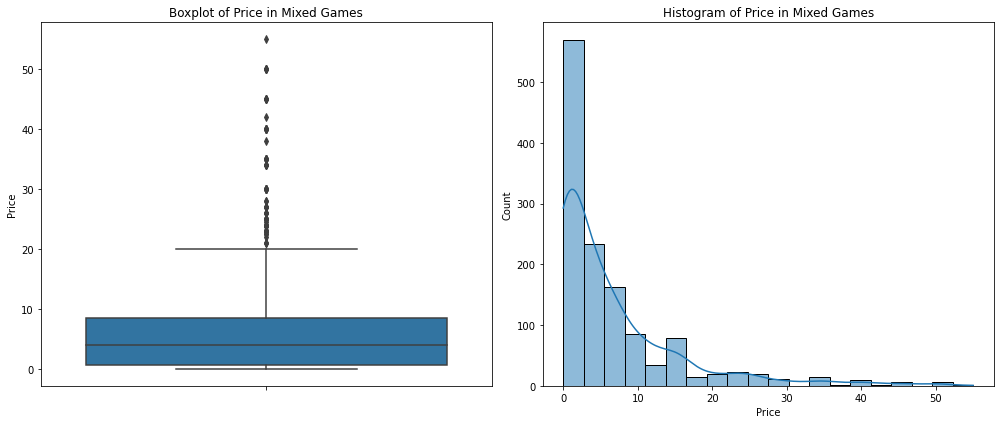

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 박스플롯
sns.boxplot(y=mixed_game_data['price'], ax=ax[0])
ax[0].set_title('Boxplot of Price in Mixed Games')
ax[0].set_ylabel('Price')

# 히스토그램
sns.histplot(mixed_game_data['price'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Price in Mixed Games')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [32]:
mixed_game_data2 = mixed_game_range(df, 0.4, 0.5, 100)
mixed_game_data2

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
62,2870,X Rebirth,2013-11-15,1,True,True,True,Egosoft,Egosoft,0,...,0.412587,1744,3386,200000-500000,24.99,space,simulation,sci_fi,action,space_sim
132,7530,Two Worlds II Castle Defense,2011-06-14,1,True,True,False,Reality Pump Studios,Topware Interactive,0,...,0.440922,320,330,200000-500000,6.99,strategy,tower_defense,fantasy,puzzle_platformer,real_time_tactics
187,11240,Space Trader: Merchant Marine,2008-10-23,1,True,False,False,Meridian4,Meridian4,0,...,0.490969,15,15,200000-500000,3.99,action,space,fps,trading,indie
275,18400,Crazy Machines 2,2008-06-20,1,True,False,False,Fakt Software,Viva Media,0,...,0.473171,66,66,100000-200000,7.19,casual,strategy,puzzle,physics,singleplayer
364,27920,Booster Trooper,2010-04-23,1,True,False,False,DnS Development,DnS Development,0,...,0.491892,10,10,20000-50000,1.69,action,indie,platformer,multiplayer,shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5957,799860,BREATHE,2018-03-08,1,True,True,False,dotBunny,dotBunny,0,...,0.486111,4,4,100000-200000,0.00,free_to_play,adventure,multiplayer,survival,simulation
6000,825310,Dude Simulator 2,2018-07-27,1,True,False,False,Kiddy,Kiddy,0,...,0.475610,12,12,20000-50000,3.99,racing,simulation,indie,adventure,action
6080,874240,MU Legend,2018-08-06,1,True,False,False,WEBZEN,WEBZEN,0,...,0.457364,129,178,200000-500000,0.00,free_to_play,hack_and_slash,mmorpg,rpg,massively_multiplayer
6081,876330,Revelation Online,2018-08-07,1,True,False,False,Netease Games,My.com,0,...,0.497059,686,686,100000-200000,0.00,free_to_play,rpg,mmorpg,massively_multiplayer,1980s


In [33]:
mixed_game_data2.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price
appid,1.000000,-0.036589,NaN,-0.052327,0.007030,-0.063425,0.105976,-0.030710,-0.040089,-0.035815,0.005390,0.011185,0.005964,-0.250150
english,-0.036589,1.000000,NaN,0.050668,0.037074,0.022180,0.020370,0.024559,0.025453,0.025093,-0.044709,0.030849,0.025833,0.051437
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.052327,0.050668,NaN,1.000000,0.682867,-0.069873,0.066946,0.018569,0.008540,0.013223,0.132792,-0.012519,-0.003557,0.155274
environ_Linux,0.007030,0.037074,NaN,0.682867,1.000000,-0.107310,0.114640,0.002478,-0.000055,0.001123,0.099349,0.024724,0.031127,0.092052
required_age,-0.063425,0.022180,NaN,-0.069873,-0.107310,1.000000,0.018185,0.180864,0.173274,0.177184,0.067802,0.090960,0.069520,0.270682
achievements,0.105976,0.020370,NaN,0.066946,0.114640,0.018185,1.000000,0.031234,0.033875,0.032721,-0.055287,-0.000046,0.005969,0.048761
positive_ratings,-0.030710,0.024559,NaN,0.018569,0.002478,0.180864,0.031234,1.000000,0.991202,0.997470,0.089934,0.331653,0.270408,0.312235
negative_ratings,-0.040089,0.025453,NaN,0.008540,-0.000055,0.173274,0.033875,0.991202,1.000000,0.998104,0.044352,0.369253,0.313235,0.310351
total_ratings,-0.035815,0.025093,NaN,0.013223,0.001123,0.177184,0.032721,0.997470,0.998104,1.000000,0.065648,0.352577,0.294005,0.311909


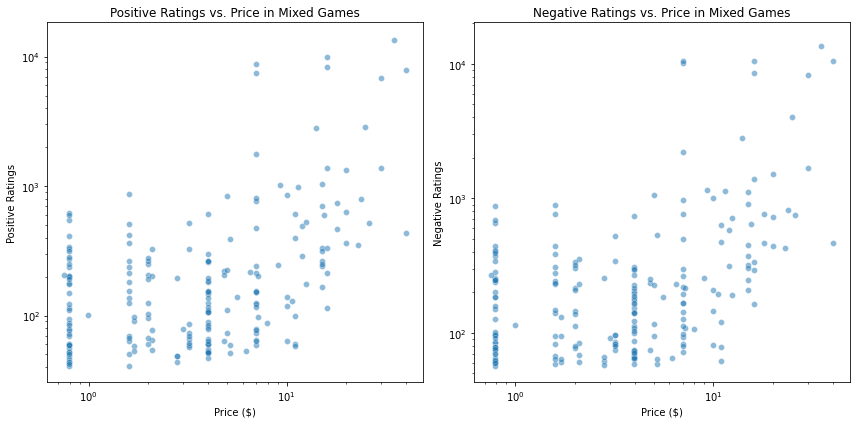

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=mixed_game_data2, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Mixed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=mixed_game_data2, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Mixed Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

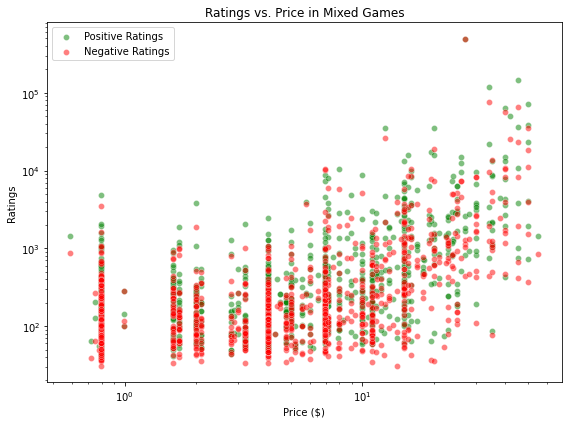

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Mixed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

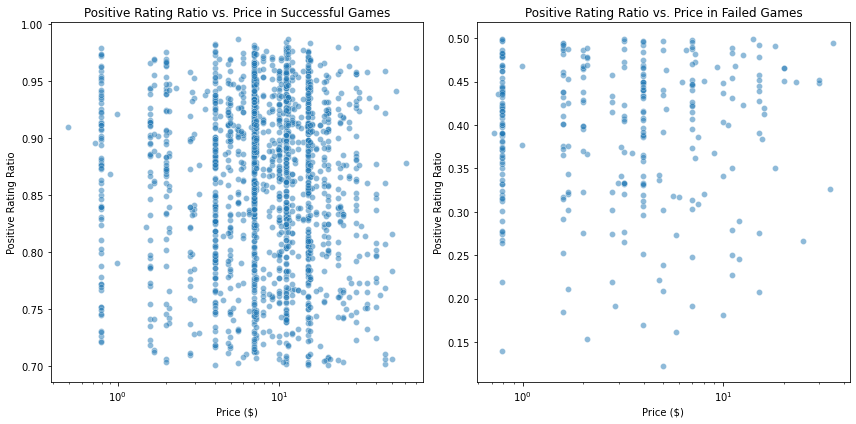

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(ax=axes[0], x='price', y='positive_rating_ratio', data=success_game_data, alpha=0.5)
axes[0].set_title('Positive Rating Ratio vs. Price in Successful Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Rating Ratio')
axes[0].set_xscale('log')

# 실패한 게임의 가격별 긍정 리뷰 비율 시각화
sns.scatterplot(ax=axes[1], x='price', y='positive_rating_ratio', data=fail_game_data, alpha=0.5)
axes[1].set_title('Positive Rating Ratio vs. Price in Failed Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Positive Rating Ratio')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()